# **IMPORTING LIBERARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['hr_data.csv']))

Saving hr_data.csv to hr_data (1).csv


In [ ]:
display(df)
#to display the data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [ ]:
df.shape
#tells the dataset dimensions

(14999, 10)

In [ ]:
df.columns
#list of all the 10 columns in out dataset

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary', 'left'],
      dtype='object')

In [ ]:
df.isna().sum()  
#returns the number of NaN values in all columns of a pandas DataFrame in Python.

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales                    0
salary                   0
left                     0
dtype: int64

In [ ]:
df.duplicated(keep="first").sum()
#to find the number of duplicates

3008

In [ ]:
df.drop_duplicates(inplace=True)
#to delete the duplicates

In [ ]:
df.shape

(11991, 10)

In [ ]:
df.info()
#prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   promotion_last_5years  11991 non-null  int64  
 7   sales                  11991 non-null  object 
 8   salary                 11991 non-null  object 
 9   left                   11991 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


## **EXPLORATORY DATA ANALYSIS**

### MONTHLY HOURS

In [ ]:
df["average_montly_hours"].unique()
#displays the unique values of a particular column

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [ ]:
bin = len(df["average_montly_hours"].unique())
bin

#length/ no. of unique items in the the particular column

215

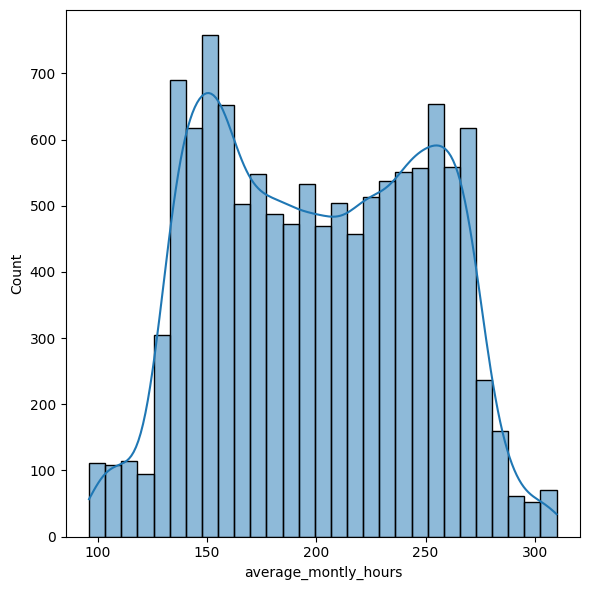

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(data = df, x = df["average_montly_hours"], kde = True) 
#KERNEL DENSITY ESTIMATE 
#method for visualizing the distribution of observations in a dataset, analogous to a histogram. 
#KDE represents the data using a continuous probability density curve in one or more dimensions.
plt.tight_layout()  #automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

### NUMBER OF PROJECTS

In [ ]:
df["number_project"].value_counts()
#Return a Series containing counts of unique values

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

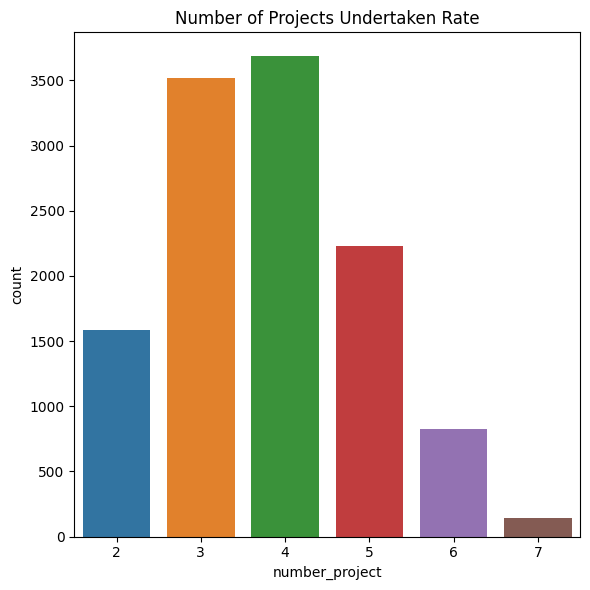

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data = df, x = "number_project")
plt.title("Number of Projects Undertaken Rate")
plt.tight_layout()
plt.show()

### PROMOTION MADE IN LAST 5 YEARS

In [ ]:
df["promotion_last_5years"].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [ ]:
labels = df["promotion_last_5years"].value_counts().index.tolist()
labels

#The tolist() function is used to convert a given array to an ordinary list with the same items, elements, or values.

[0, 1]

In [ ]:
labels = ["Promoted" if i==0 else "Not Promotted" for i in labels]
labels

['Promoted', 'Not Promotted']

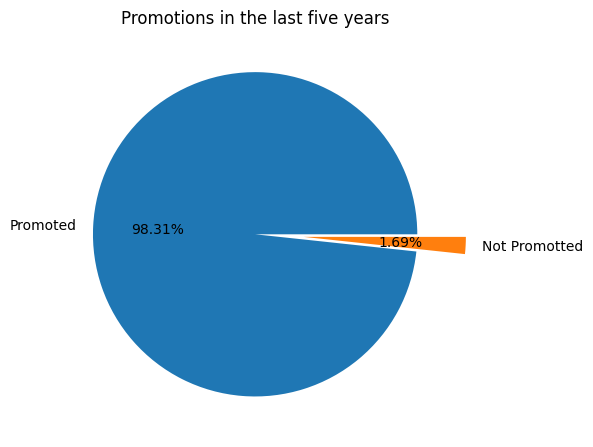

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(x=df["promotion_last_5years"].value_counts(), labels = labels, autopct = "%1.2f%%", explode = [0, 0.3])
#autopct enables you to display the percent value using Python string formatting
#To “explode” a pie chart means to make one of the wedges of the pie chart to stand out
plt.title("Promotions in the last five years")
plt.tight_layout()
plt.show()

### WORK ACCIDENTS

In [ ]:
df["Work_accident"].value_counts()

0    10141
1     1850
Name: Work_accident, dtype: int64

In [ ]:
labels = df["Work_accident"].value_counts().index.tolist()
labels

[0, 1]

In [ ]:
labels = ["Work Accident" if i==1 else "No Work Accident" for i in labels]
labels

['No Work Accident', 'Work Accident']

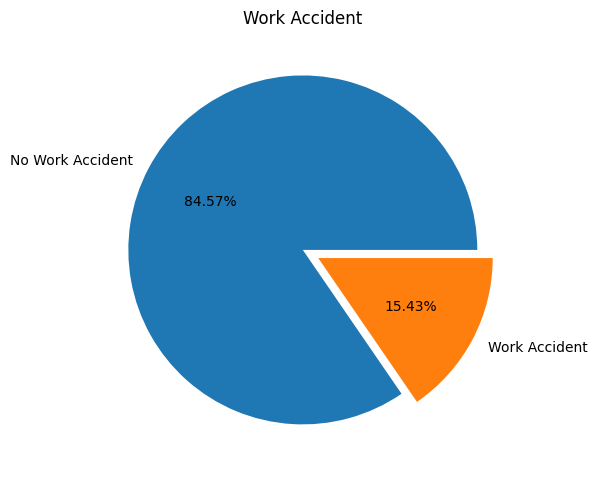

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(x=df["Work_accident"].value_counts(), labels = labels, autopct = "%1.2f%%", explode = [0, 0.1])
plt.title("Work Accident")
plt.tight_layout()
plt.show()

### TIME SPENT IN COMPANY

In [ ]:
df["time_spend_company"].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

In [ ]:
labels = df["time_spend_company"].value_counts().index.tolist()
labels

[3, 2, 4, 5, 6, 10, 7, 8]

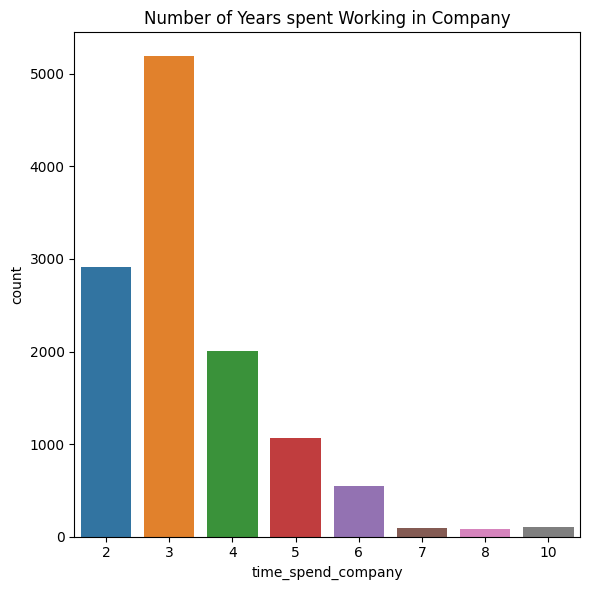

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data = df, x = "time_spend_company")
plt.title("Number of Years spent Working in Company")
plt.tight_layout()
plt.show()

In [ ]:
df["time_spend_company"].mean()

3.3648569760653824

### DEPARTMENT COMPARISON

In [ ]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df["sales"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: sales, dtype: int64

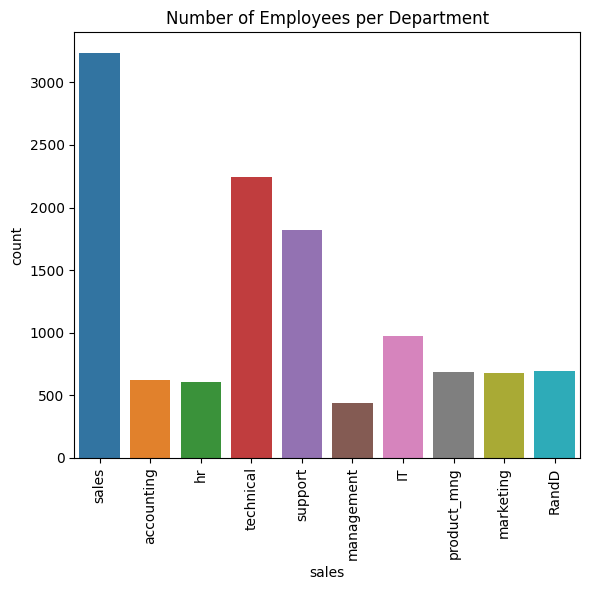

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data = df, x = "sales")
plt.title("Number of Employees per Department")
plt.xticks(rotation=90)   #to rotate the labels of x-axis
plt.tight_layout()
plt.show()

In [ ]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df["salary"].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [ ]:
labels = df["salary"].value_counts().index.tolist()
labels

['low', 'medium', 'high']

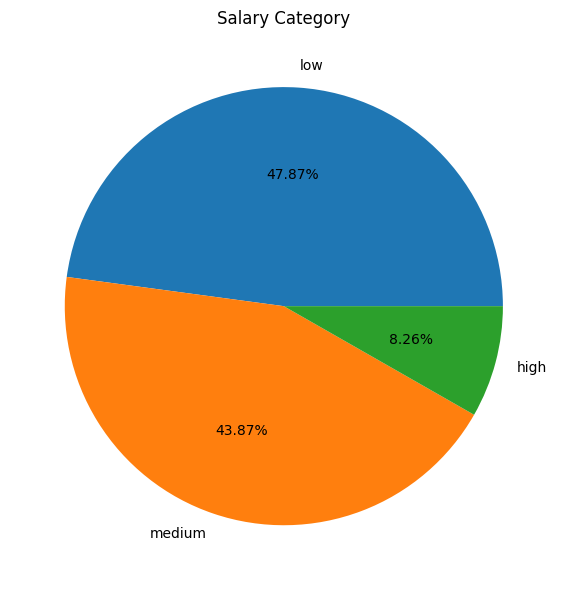

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(x = df["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Category")
plt.tight_layout()
plt.show()

## **DATA PREPROCESSING**

In [ ]:
df.rename(columns={"sales": "department", "salary": "salary_level"}, inplace=True)

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary_level', 'left'],
      dtype='object')

### CATEGORICAL ENCODING

In [ ]:
categorical_cols = ["department", "salary_level"]
encoded_cols = pd.get_dummies(df[categorical_cols], prefix="cat")

#a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different models.

In [ ]:
encoded_cols

,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,1,0,0,0,0,0,1,0,0
11996,0,0,0,0,1,0,0,0,0,0,1,0,0
11997,0,0,0,0,1,0,0,0,0,0,1,0,0
11998,0,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
df = df.join(encoded_cols)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary_level,left,...,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,0,sales,low,1,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,sales,medium,1,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,sales,low,1,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,sales,low,1,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df.drop(["department", "salary_level"], inplace=True, axis="columns")

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'left', 'cat_IT', 'cat_RandD',
       'cat_accounting', 'cat_hr', 'cat_management', 'cat_marketing',
       'cat_product_mng', 'cat_sales', 'cat_support', 'cat_technical',
       'cat_high', 'cat_low', 'cat_medium'],
      dtype='object')

### MIN MAX SCALING

In [ ]:
df["average_montly_hours"].min()

96

In [ ]:
df["average_montly_hours"].max()

310

### SPLITTING THE DATA INTO TRAINING AND TESTING DATASET

In [ ]:
X = df.drop("left", axis=1) #The drop() method removes the specified row or column.
y = df["left"]

In [ ]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
X_train.shape

(9592, 20)

In [ ]:
X_test.shape

(2399, 20)

# **TRAIN MODEL**

### Logistic Regression Model



In [ ]:
logReg = LogisticRegression(max_iter=2000)

In [ ]:
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
logReg_predictions = logReg.predict(X_test)

In [ ]:
accuracy_score(y_test, logReg_predictions)

0.8203418090871196

In [ ]:
print(classification_report(y_test, logReg_predictions))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1977
           1       0.48      0.20      0.29       422

    accuracy                           0.82      2399
   macro avg       0.66      0.58      0.59      2399
weighted avg       0.78      0.82      0.79      2399



In [ ]:
cm = confusion_matrix(y_test, logReg_predictions)

In [ ]:
cm

array([[1882,   95],
       [ 336,   86]])

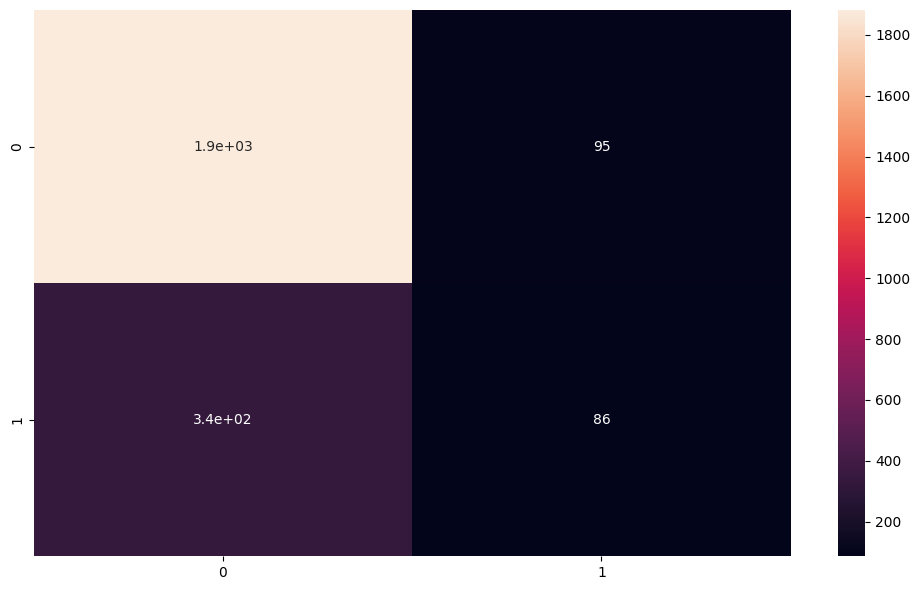

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
svm_prediction = svm.predict(X_test)
accuracy_score(y_test, svm_prediction)

0.8240933722384327

In [ ]:
print(classification_report(y_test, svm_prediction ))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1977
           1       0.00      0.00      0.00       422

    accuracy                           0.82      2399
   macro avg       0.41      0.50      0.45      2399
weighted avg       0.68      0.82      0.74      2399



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, svm_prediction)
cm

array([[1977,    0],
       [ 422,    0]])

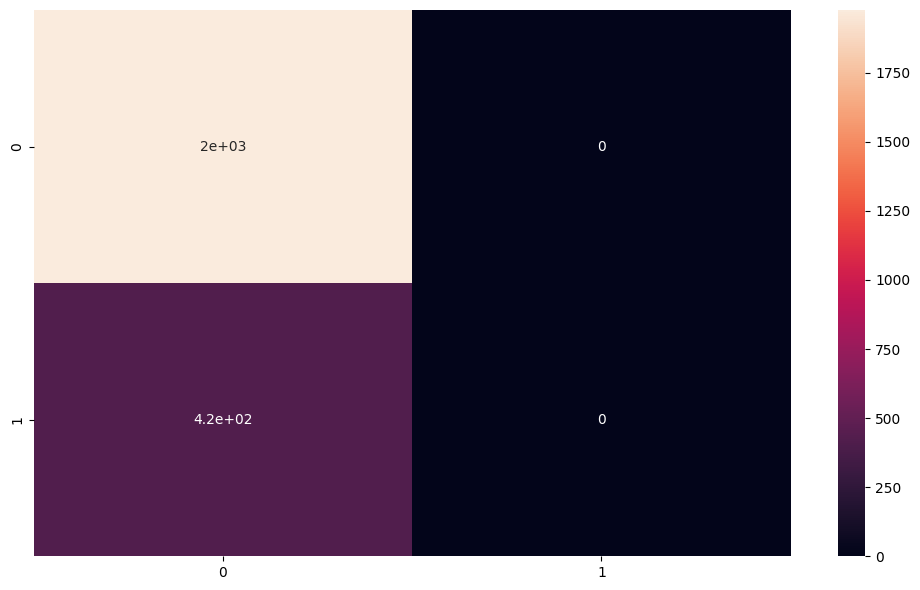

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

### NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
naive_prediction = nb.predict(X_test)
accuracy_score(y_test, naive_prediction)

0.7423926636098375

In [ ]:
print(classification_report(y_test, naive_prediction ))

              precision    recall  f1-score   support

           0       0.93      0.74      0.83      1977
           1       0.38      0.75      0.51       422

    accuracy                           0.74      2399
   macro avg       0.66      0.75      0.67      2399
weighted avg       0.84      0.74      0.77      2399



In [ ]:
cm = confusion_matrix(y_test, naive_prediction)

In [ ]:
cm

array([[1463,  514],
       [ 104,  318]])

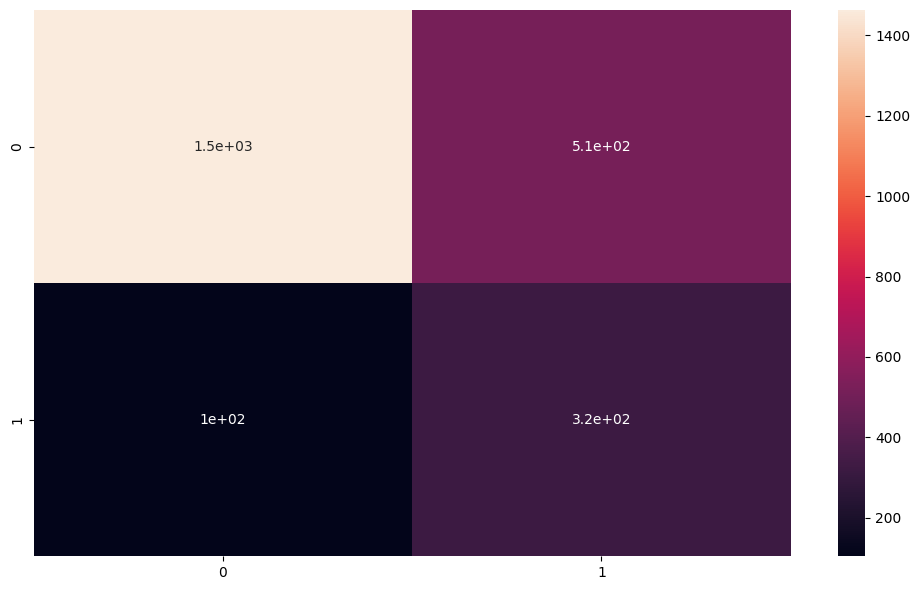

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

### Random Forest

it is a bagging algorithm


In [ ]:
ranForest = RandomForestClassifier(n_estimators=100)

In [ ]:
ranForest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
ranForest_predictions = ranForest.predict(X_test)

In [ ]:
accuracy_score(y_test, ranForest_predictions)

0.9808253438932889

In [ ]:
print(classification_report(y_test, ranForest_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1977
           1       0.98      0.91      0.94       422

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399



In [ ]:
cm = confusion_matrix(y_test, ranForest_predictions)

In [ ]:
cm

array([[1968,    9],
       [  37,  385]])

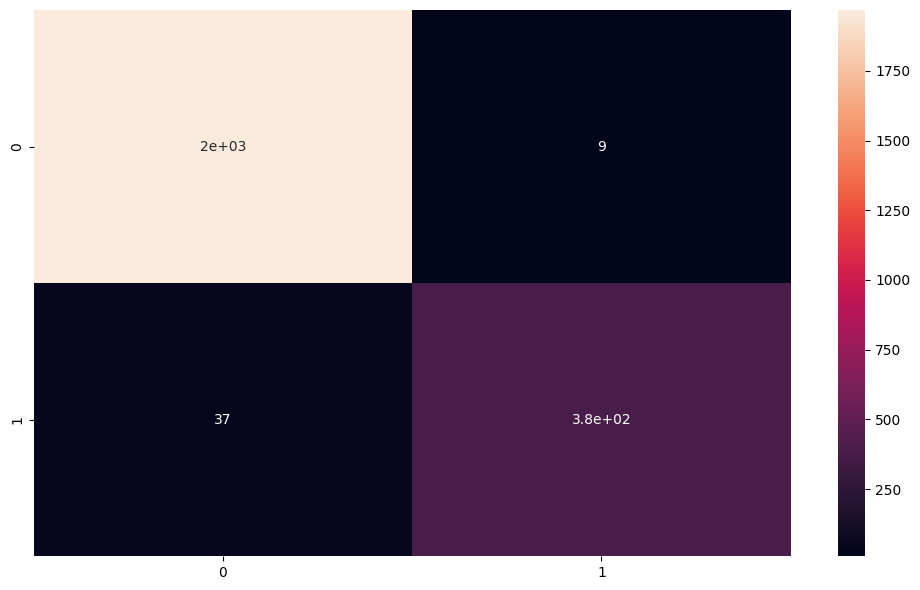

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

### **XGBOOST**

XGBoost Classifier


In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_predictions = xgb.predict(X_test)
accuracy_score(xgb_predictions, y_test)

0.9799916631929971

In [ ]:
accuracy_score(y_test, xgb_predictions)

0.9799916631929971

In [ ]:
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1977
           1       0.96      0.92      0.94       422

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [ ]:
cm = confusion_matrix(y_test, xgb_predictions)

In [ ]:
cm

array([[1961,   16],
       [  32,  390]])

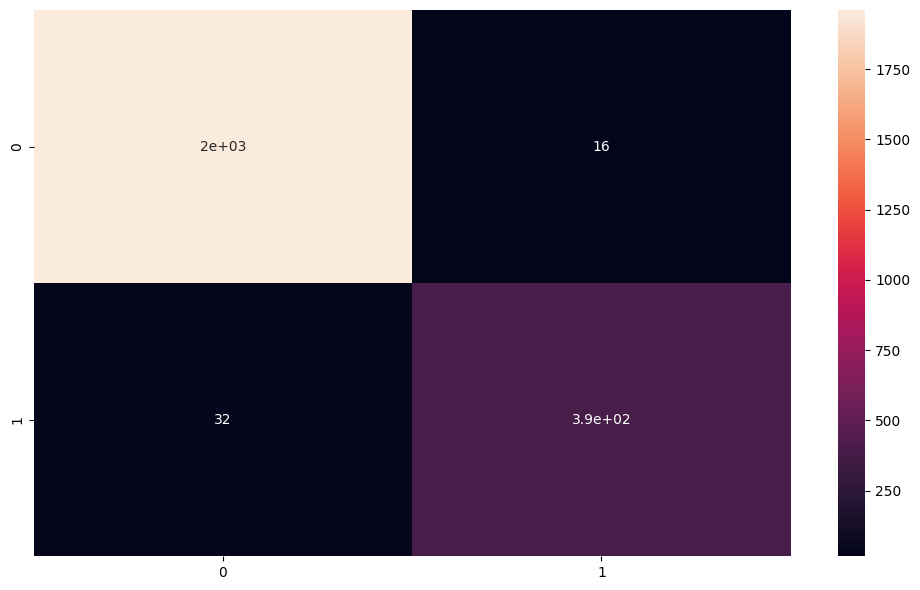

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

## Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [ ]:
parameter = {
    'criterion': ["gini", "entropy"],
    "n_estimators": [10, 100, 150, 200],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": ["auto", "sqrt", "log2"]
}

In [ ]:
kfold = StratifiedKFold(n_splits=5)

In [ ]:
clf = GridSearchCV(ranForest, parameter, scoring="accuracy", n_jobs=2, cv=kfold)

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [10, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
clf.get_params()

{'cv': StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': 2,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'n_estimators': [10, 100, 150, 200],
  'min_samples_leaf': [1, 2, 4, 6],
  'max_features': ['auto', 'sqrt', 'log2']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 '

In [ ]:
clf.best_score_

0.9200000000000002

In [ ]:
clf.score(X_test, y_test)

0.88